In [3]:
from scipy.spatial import distance as dist
from imutils import face_utils
import imutils
import dlib
import cv2
import winsound
frequency = 2500
duration = 1000

def eyeAspectRatio(eye):
    #Vertical
    A = dist.euclidean(eye[1], eye[5])
    B = dist.euclidean(eye[2], eye[4])
    #Horizontal
    C = dist.euclidean(eye[0], eye[3])
    ear = (A + B) / (2.0 * C)
    return ear

count = 0

earThresh = 0.3 #distance between vertical eye coordinate Threshold
earFrames = 48 #consecutive frames for eye closure
shapePredictor = "shape_predictor_68_face_landmarks.dat"


cam = cv2.VideoCapture(0)
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(shapePredictor)


#get the coord of left & right eye
(lStart, lEnd) = face_utils.FACIAL_LANDMARKS_IDXS["left_eye"]
(rStart, rEnd) = face_utils.FACIAL_LANDMARKS_IDXS["right_eye"]


while True:
    _, frame = cam.read()
    frame = imutils.resize(frame, width=450)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    rects = detector(gray, 0)

    for rect in rects:
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)

        leftEye = shape[lStart:lEnd]
        rightEye = shape[rStart:rEnd]

        
        leftEAR = eyeAspectRatio(leftEye)
        rightEAR = eyeAspectRatio(rightEye)

        ear = (leftEAR + rightEAR) / 2.0

        leftEyeHull = cv2.convexHull(leftEye)
        rightEyeHull = cv2.convexHull(rightEye)
        cv2.drawContours(frame, [leftEyeHull], -1, (0, 0, 255), 1)
        cv2.drawContours(frame, [rightEyeHull], -1, (0, 0, 255), 1)

        if ear < earThresh:
            count += 1

            if count >= earFrames:
                cv2.putText(frame, "DROWSINESS DETECTED", (10, 30),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
                winsound.Beep(frequency, duration)
        else:
            count = 0

    cv2.imshow("Frame", frame)
    key = cv2.waitKey(1) & 0xFF

    if key == ord("q"):
        break

cam.release()
cv2.destroyAllWindows()


ModuleNotFoundError: No module named 'dlib'

In [2]:
!pip install imutils

  Using cached imutils-0.5.4.tar.gz (17 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25891 sha256=72eb0d40b6716867dfcd52a8696b7dd7ab09e6cf38207935d38d8fe8e0d56a50
  Stored in directory: c:\users\kaviya\appdata\local\pip\cache\wheels\5b\76\96\ad0c321506837bef578cf3008df3916c23018435a355d9f6b1
Successfully built imutils


In [5]:
!pip install dlib

  Using cached dlib-19.24.6.tar.gz (3.4 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for dlib
Failed to build dlib


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [84 lines of output]
  C:\Users\kaviya\AppData\Local\Temp\pip-install-oq82jj8h\dlib_25844eed154d43d7940ac6b206131a49\setup.py:234: SyntaxWarning: invalid escape sequence '\('
    major = re.findall("set\(CPACK_PACKAGE_VERSION_MAJOR.*\"(.*)\"", open(cmake_file).read())[0]
  C:\Users\kaviya\AppData\Local\Temp\pip-install-oq82jj8h\dlib_25844eed154d43d7940ac6b206131a49\setup.py:235: SyntaxWarning: invalid escape sequence '\('
    minor = re.findall("set\(CPACK_PACKAGE_VERSION_MINOR.*\"(.*)\"", open(cmake_file).read())[0]
  C:\Users\kaviya\AppData\Local\Temp\pip-install-oq82jj8h\dlib_25844eed154d43d7940ac6b206131a49\setup.py:236: SyntaxWarning: invalid escape sequence '\('
    patch = re.findall("set\(CPACK_PACKAGE_VERSION_PATCH.*\"(.*)\"", open(cmake_file).read())[0]
  running bdist_wheel
  running build
  running build_ext
  C:\Users\kaviya\AppData\Local\Temp\pip-install-oq

In [ ]:
conda create --name myenv python=3.8
conda activate myenv
conda install pip
pip install imutils



             Word  Frequency
0             big          7
1            data          9
2          refers          1
3     collections          1
4       difficult          1
5         analyze          1
6           using          1
7     traditional          1
8      management          1
9   characterized          2
10          large          1
11          often          2
12        include          1
13     structured          1
14           like          2
15      financial          1
16   unstructured          1
17         social          1
18          media          1
19      processed          1
20           high          1
21           come          1
22       anywhere          1
23       anything          1
24      monitored          1
25      including          1
26         mobile          1
27        machine          2
28  organizations          1
29            use          2
30           make          1
31      decisions          1
32        improve          1
33      proces

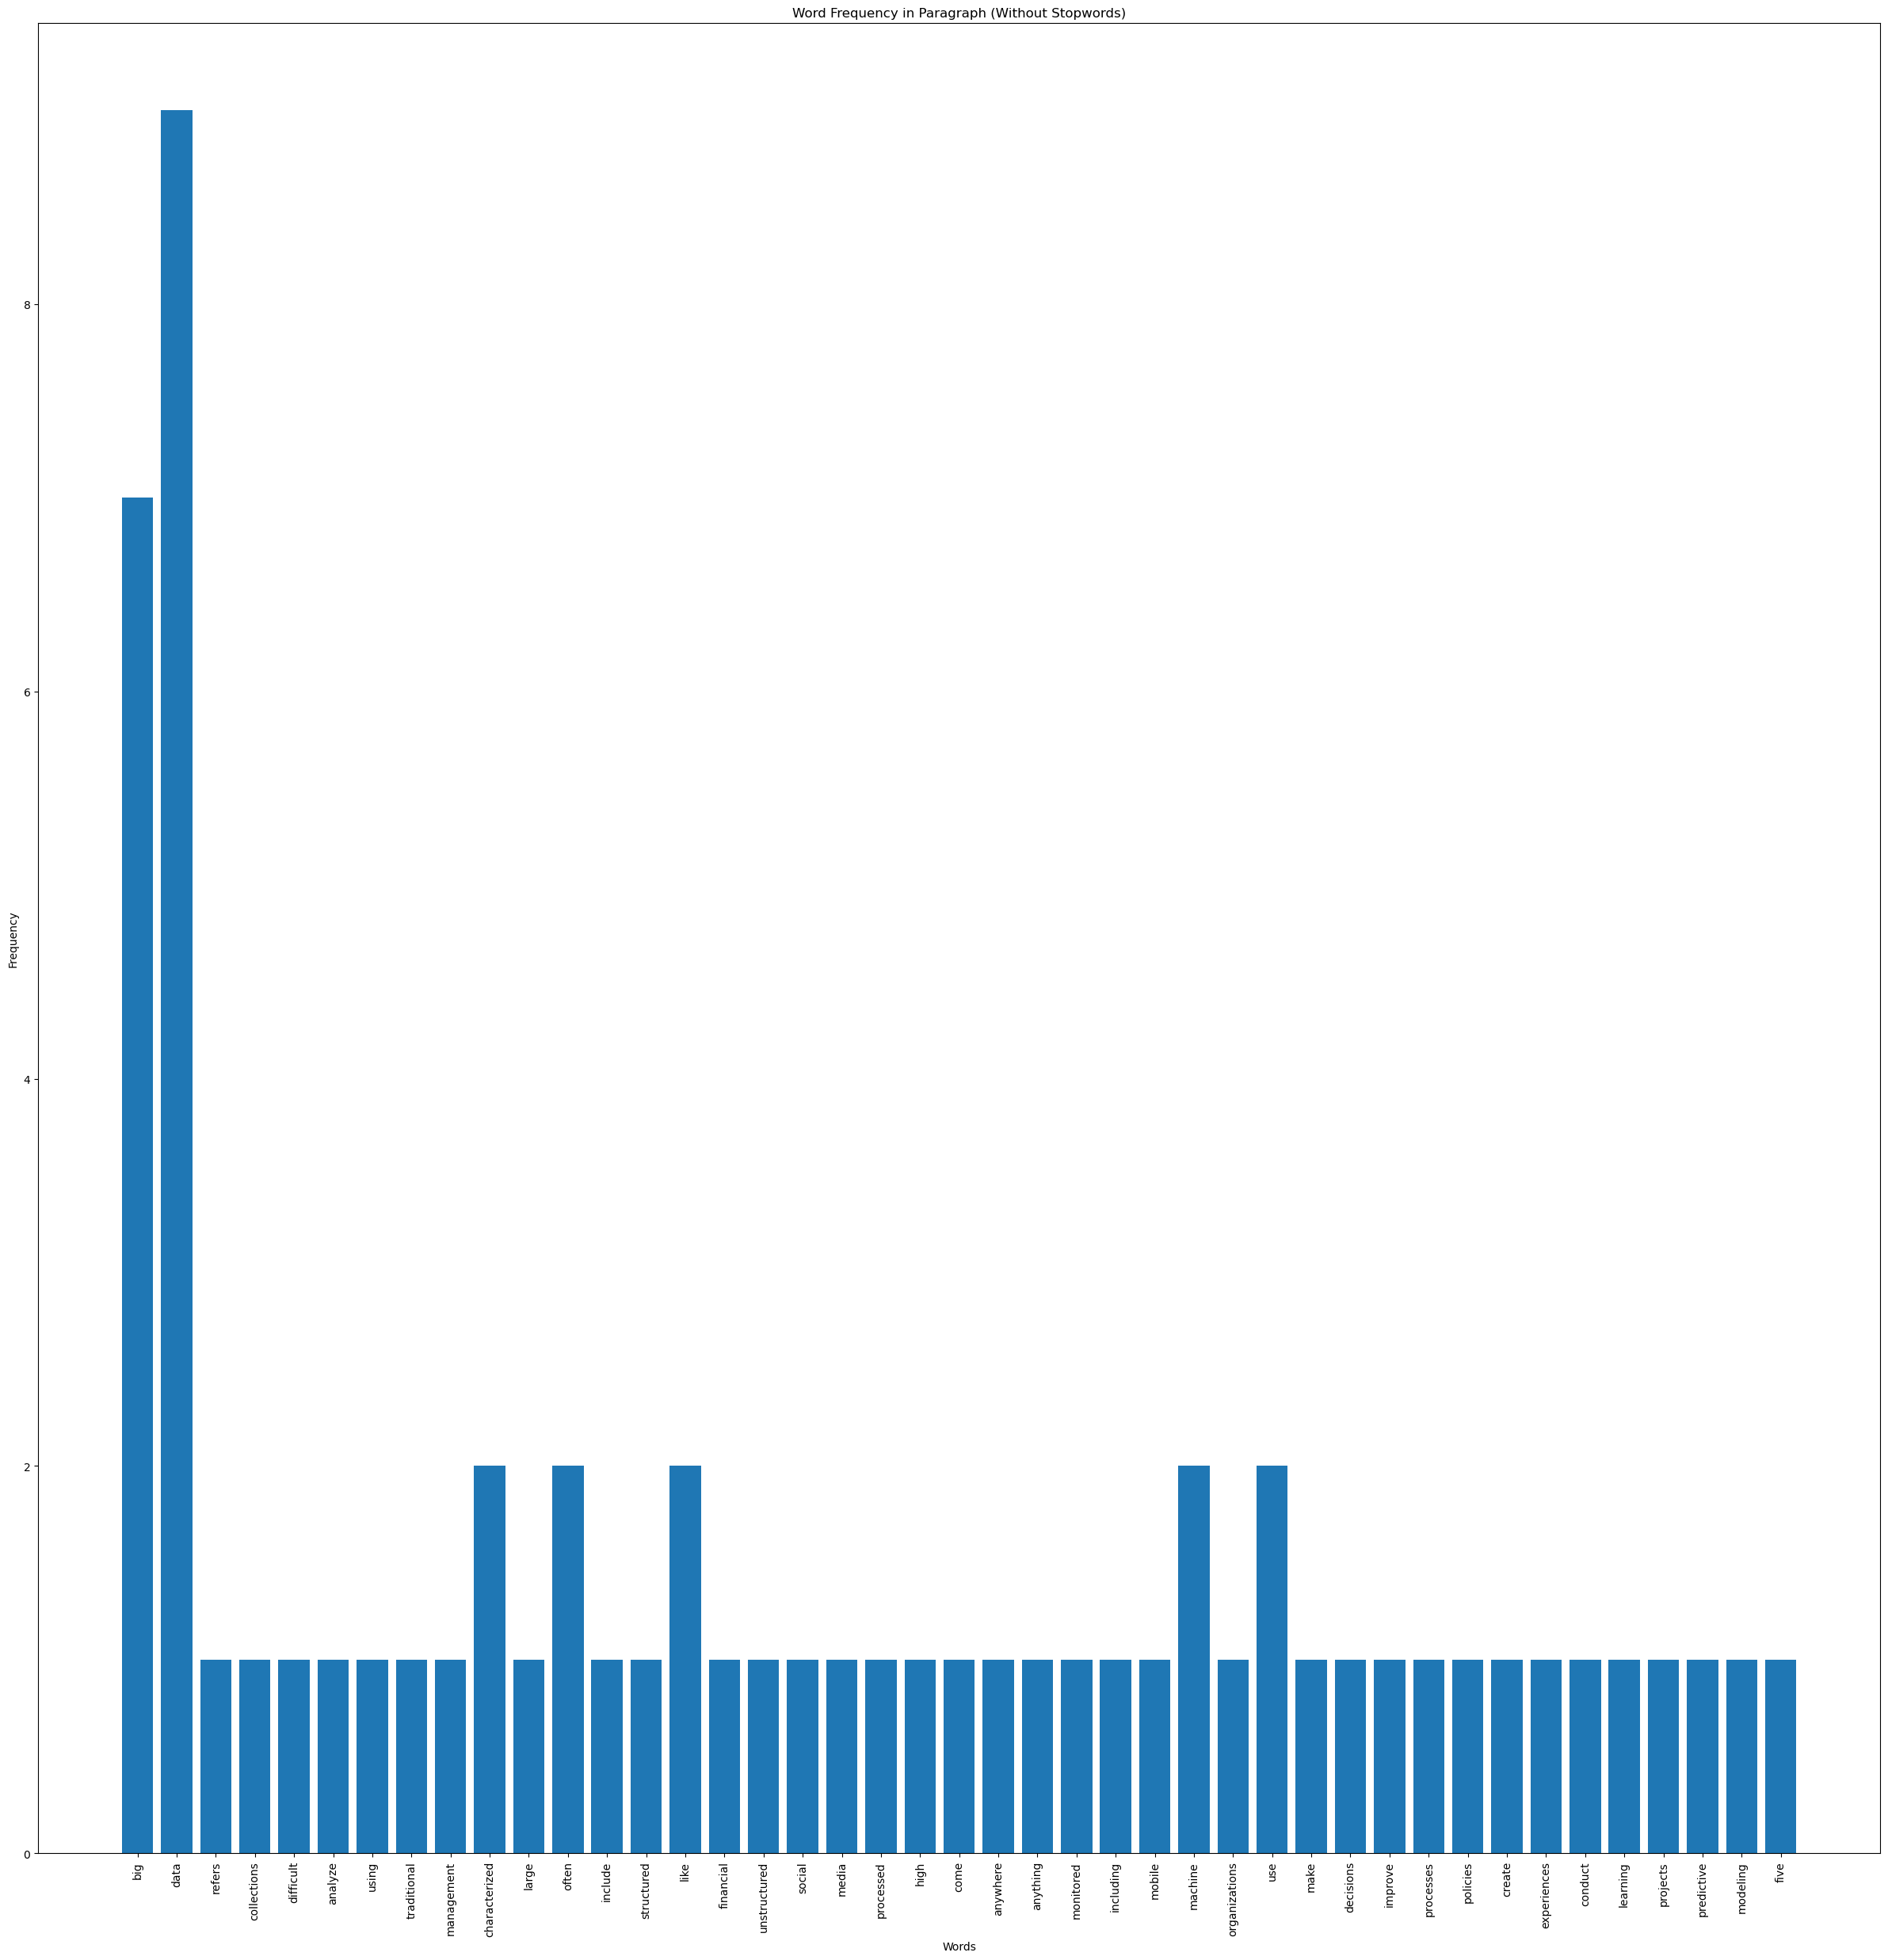

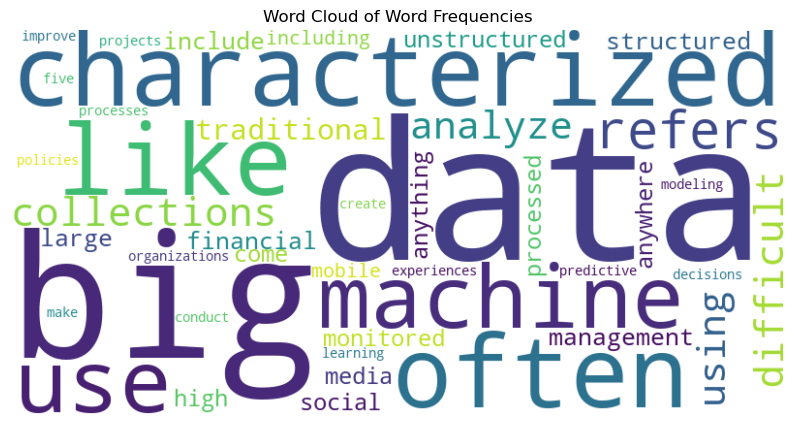

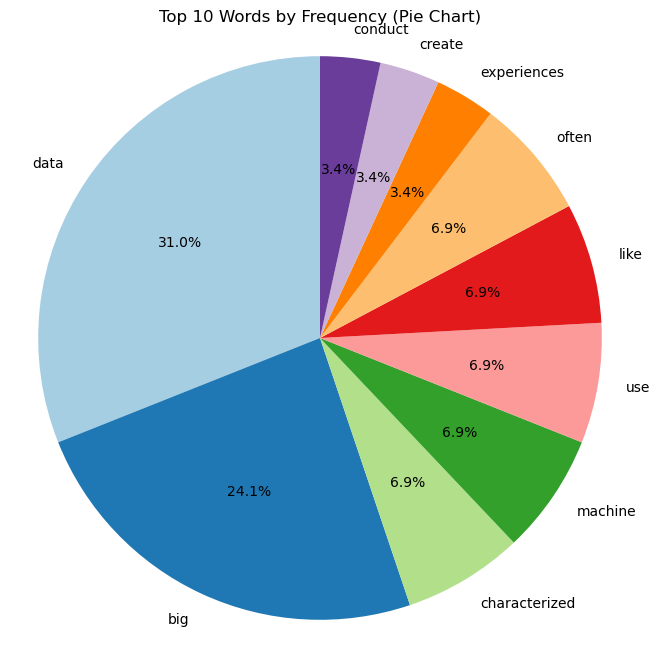

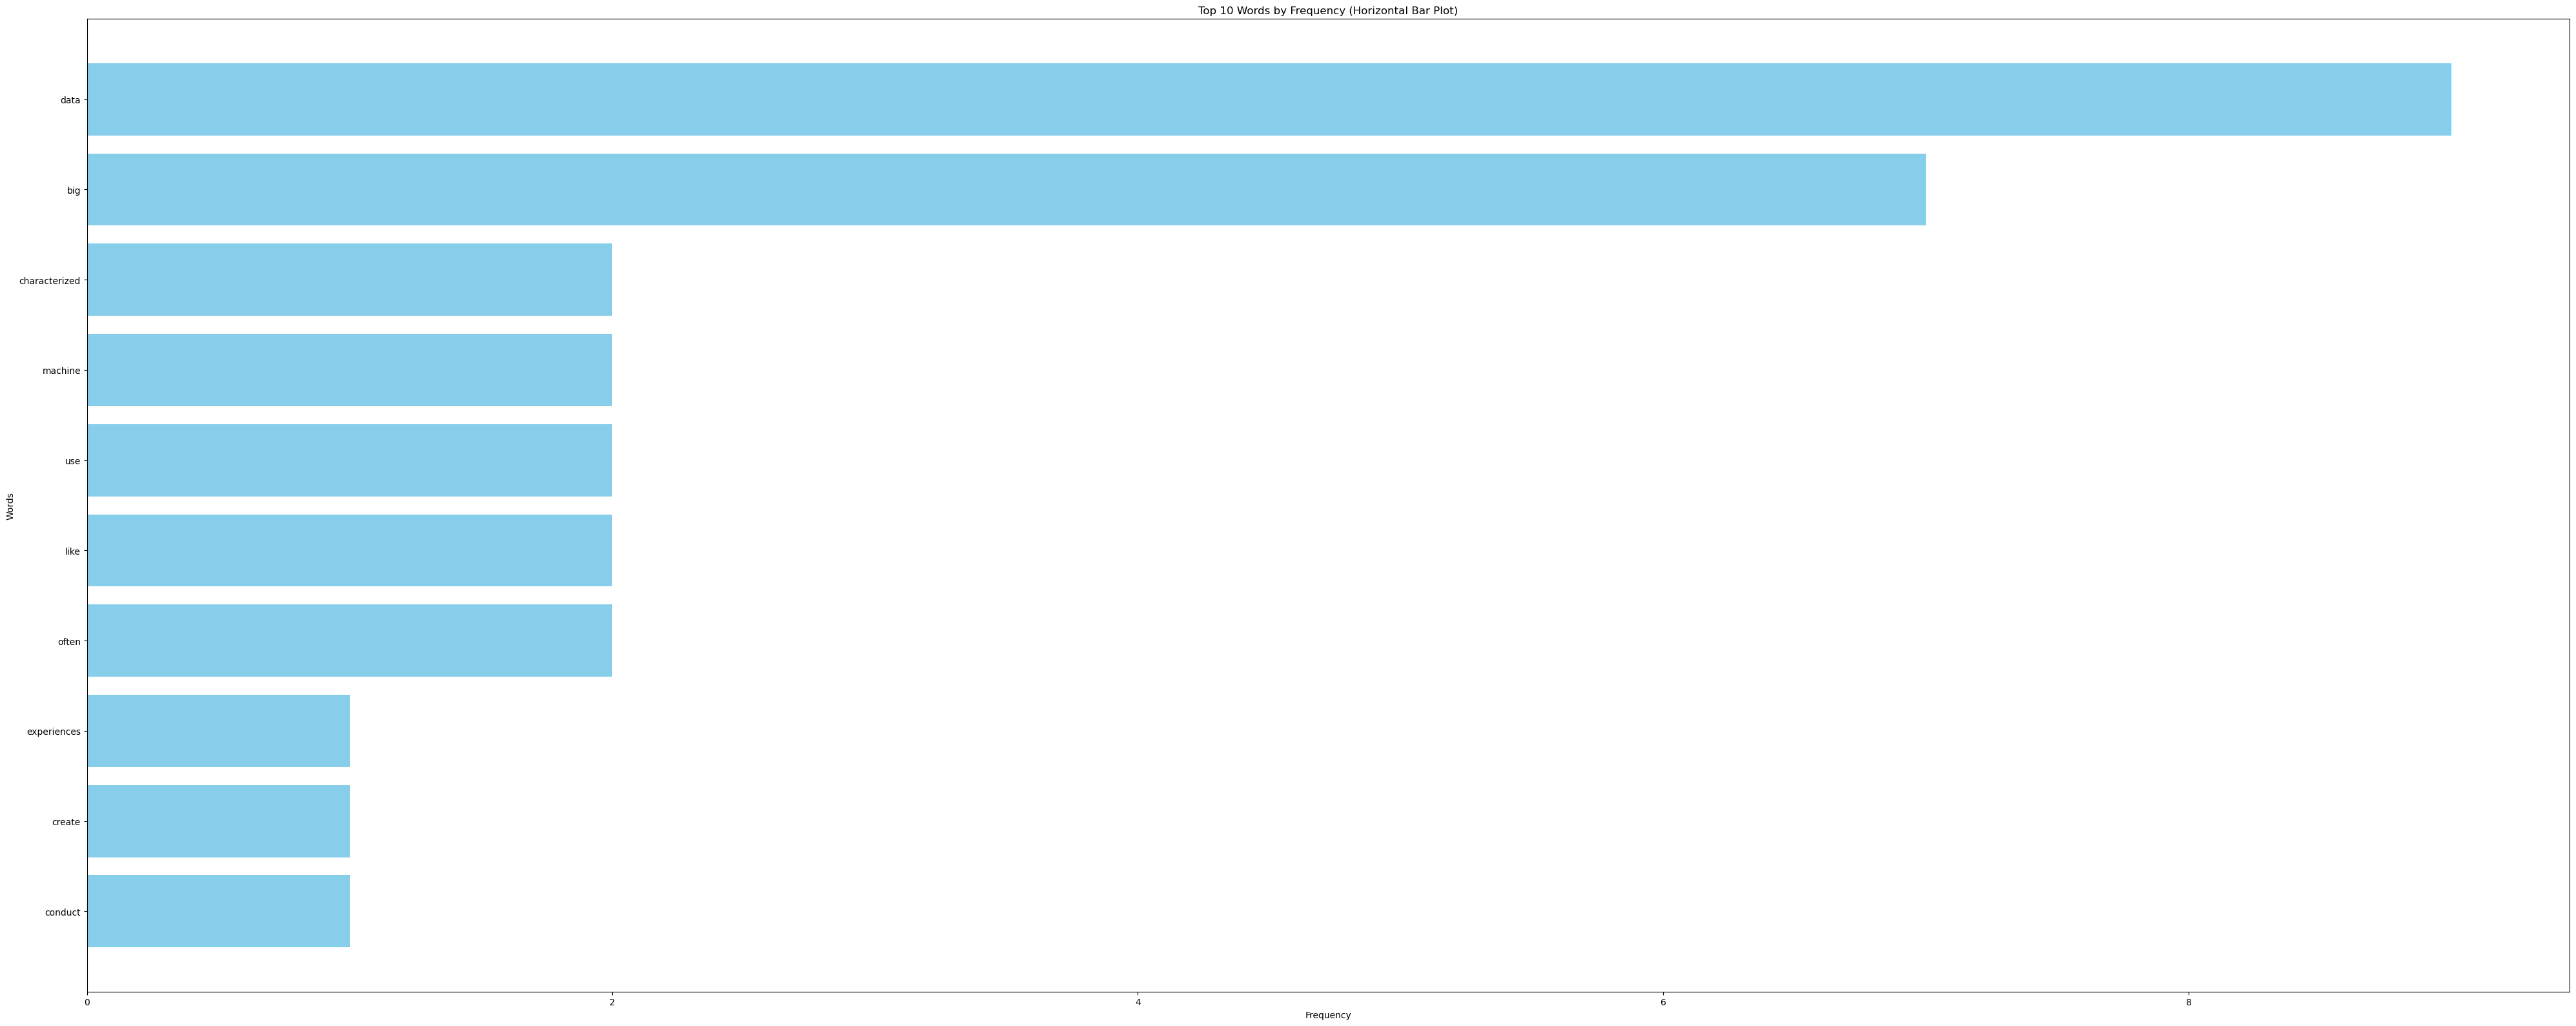

In [10]:
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud

# Sample paragraph
paragraph = """
Big data refers to large, complex, and ever-growing collections of data that are difficult to store, process, and analyze using traditional data management systems: 
Size: Big data is characterized by its large volume, often in zettabytes. 
Variety: Big data can include structured data, like financial transactions, and unstructured data, like social media posts. 
Velocity: Big data is generated, collected, and processed at a high speed. 
Big data can come from anywhere or anything that can be monitored digitally, including computers, mobile devices, and machine sensors. 
Organizations use big data to:
Make decisions
Improve processes and policies
Create customer-centric products, services, and experiences
Conduct machine learning projects
Use predictive modeling 
Big data is often characterized by the five Vs: volume, velocity, variety, veracity, and value.
"""
# Preprocess the text
stop_words = set(stopwords.words('english'))
words = paragraph.lower().split()
# Remove stopwords
filtered_words = [word for word in words if word.isalpha() and word not in stop_words]
# Create a word frequency counter
word_counts = Counter(filtered_words)
# Convert the word frequencies into a dataset (Pandas DataFrame)
df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency'])
print(df)
# Find the word with the highest frequency
most_common_word, frequency = word_counts.most_common(1)[0]
print(f"The most repeated word is '{most_common_word}' with a frequency of {frequency}.")

# Visualize the word frequencies
plt.figure(figsize=(30, 30))
plt.bar(df['Word'], df['Frequency'])
plt.title('Word Frequency in Paragraph (Without Stopwords)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()
# Visualization 2: Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Word Frequencies')
plt.show()
# Visualization 3: Pie Chart of Top 10 Words
top_words = df.sort_values(by='Frequency', ascending=False).head(10)
plt.figure(figsize=(8, 8))
plt.pie(top_words['Frequency'], labels=top_words['Word'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Top 10 Words by Frequency (Pie Chart)')
plt.axis('equal')
plt.show()
# Visualization 4: Horizontal Bar Chart of Top 10 Words
plt.figure(figsize=(40, 16))
plt.barh(top_words['Word'], top_words['Frequency'], color='skyblue')
plt.title('Top 10 Words by Frequency (Horizontal Bar Plot)')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.gca().invert_yaxis()  # Invert to show highest frequency at the top
plt.tight_layout()
plt.show()

In [7]:
!pip install wordcloud